<h1>Titanic tutorial</h1>
This section is based on: https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide#

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

sns.set()

In [480]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [481]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [482]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kelly, Miss. Anna Katherine ""Annie Kate""",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [483]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [484]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h4> Passenger class </h4>

In [485]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [486]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [487]:
train.groupby('Pclass').Survived.value_counts()
# Class can be a good predictor.

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [488]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
# High percentage of survival in 1st class, moderate in 2nd, low in 3rd.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


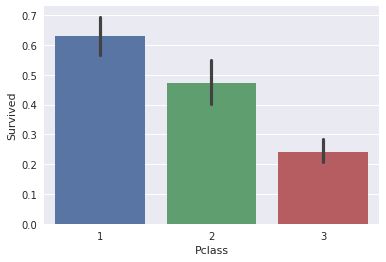

In [489]:
sns.barplot(x='Pclass', y='Survived', data=train)

<h4> Sex </h4>

In [490]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [491]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [492]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
# Female has a high chance of survival

,Sex,Survived
0,female,0.742038
1,male,0.188908


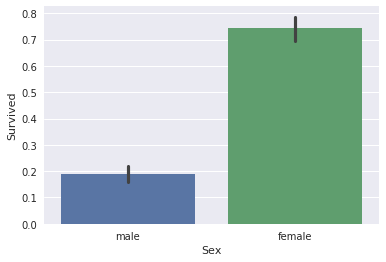

In [493]:
sns.barplot(x='Sex', y='Survived', data=train)

<h4> Pclass & sex vs Survival </h4>

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0,0.5,'Percentage')

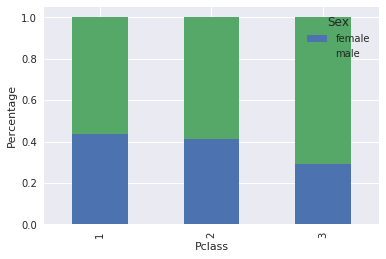

In [494]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

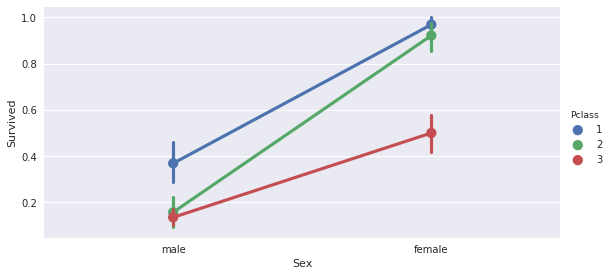

In [495]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

Women in 1st and 2nd class has ~100% of survival chance. 
Men in 2nd and 3rd class has ~10% of survival chance.


<h4> Embarked </h4>

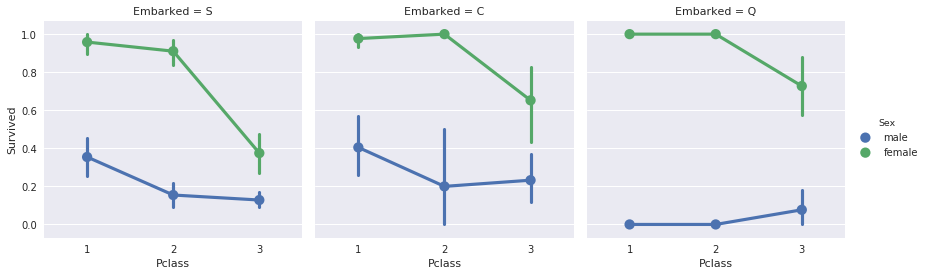

In [496]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

<h4> Ebarked vs. survival </h4>

In [497]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [498]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [499]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


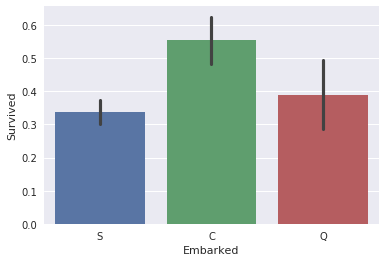

In [500]:
sns.barplot(x='Embarked', y='Survived', data=train)
# Is it correlated with gender?

Sex       female  male
Embarked              
C             73    95
Q             36    41
S            203   441


Text(0,0.5,'Percentage')

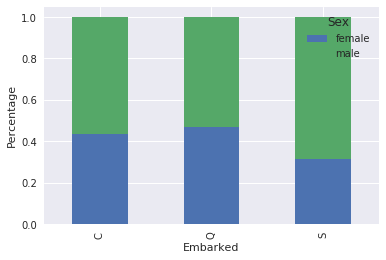

In [501]:
tab = pd.crosstab(train['Embarked'], train['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Percentage')

<h4> Parent child vs. survival </h4>

In [502]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [503]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


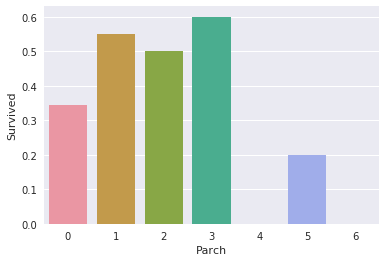

In [504]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

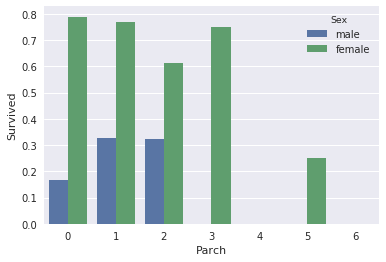

In [505]:
sns.barplot(x='Parch', y='Survived', hue="Sex", ci=None, data=train) # ci=None will hide the error bar

<h4> Siblings </h4>

In [506]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [507]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [508]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


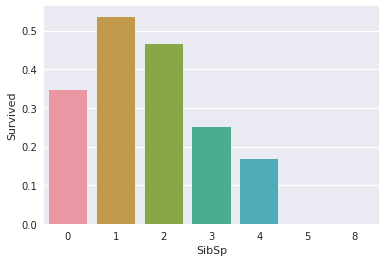

In [509]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

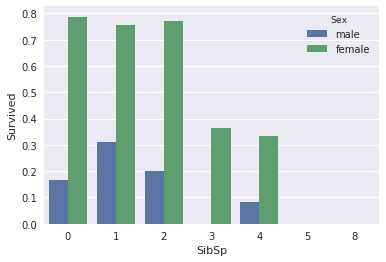

In [510]:
sns.barplot(x='SibSp', y='Survived', hue="Sex", ci=None, data=train) # ci=None will hide the error bar

<h4> Age vs. survival </h4>

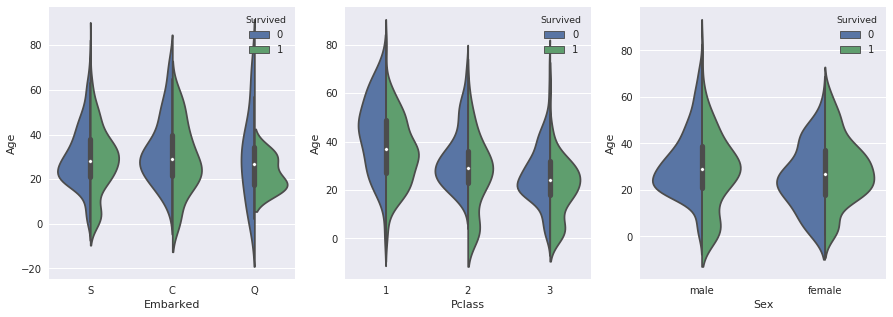

In [511]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

/home/danka/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/danka/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/danka/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/danka/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/danka/anaconda3/lib/python3.6/site

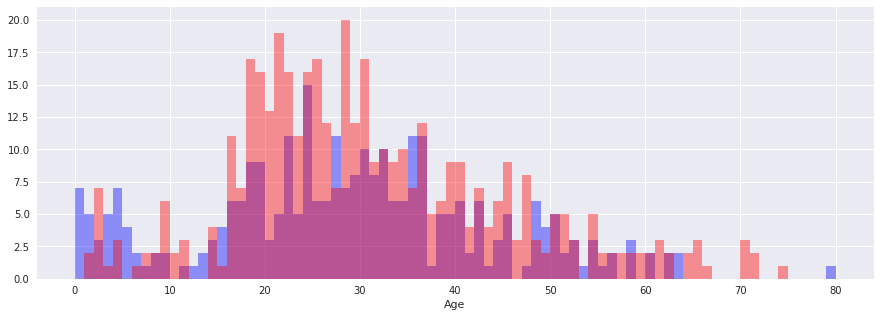

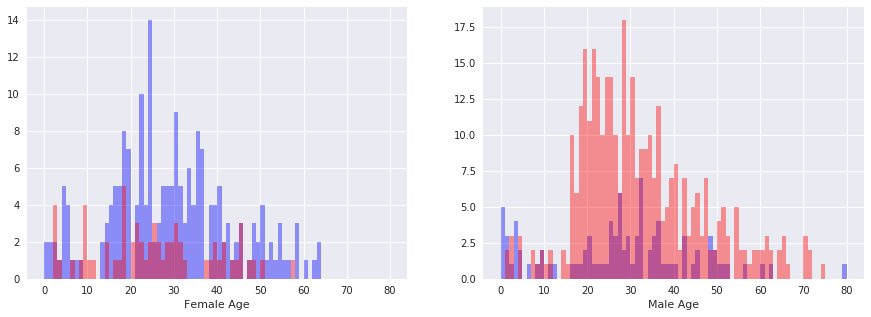

In [512]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

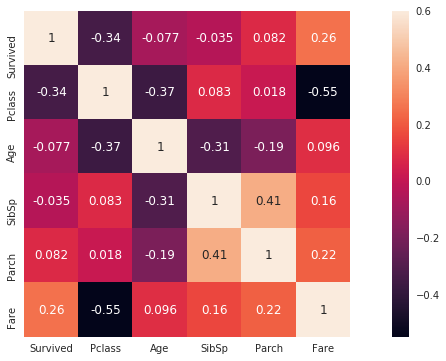

In [513]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)


<h3>Additional feature exploration</h3>

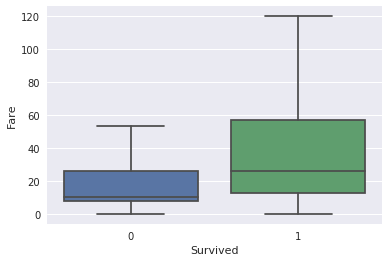

In [514]:
sns.boxplot(x='Survived', y='Fare', data=train, showfliers=False)

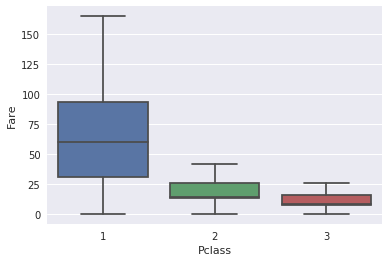

In [515]:
sns.boxplot(x='Pclass', y='Fare', data=train, showfliers=False)

In [516]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [517]:
cabin = train[['Cabin', 'PassengerId']].groupby('Cabin', as_index=False).count()

In [518]:
cabin.sort_values('PassengerId', ascending=False)

,Cabin,PassengerId
63,C23 C25 C27,4
145,G6,4
47,B96 B98,4
141,F2,3
62,C22 C26,3
116,E101,3
142,F33,3
90,D,3
78,C78,2
35,B57 B59 B63 B66,2


In [519]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<h3>Lib for models evaluation</h3>

In [520]:
def train_baseline_models(X_train, y_train):
    classifiers = {
        'Logistic regression': LogisticRegression(),
        'Naive Bayes': GaussianNB(),
        'Support Vector Machines': SVC(),
        'Linear SVC': LinearSVC(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random forest': RandomForestClassifier(n_estimators=100),
        'Stochastic Gradient Descent': SGDClassifier(max_iter=5, tol=None)
    }
    scores = {}
    for clf_name, clf in classifiers.items():
        scores[clf_name] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

def train_knn(X_train, y_train):
    scores = {}
    for k in [1, 3, 5, 7, 9, 11, 13]:
        clf = KNeighborsClassifier(n_neighbors = k)
        scores[k] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

def train_decision_tree(X_train, y_train):
    scores = {}
    X_train_standarized = (X_train - X_train.mean()) / X_train.std()
    for min_sample_leaf in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
        clf = DecisionTreeClassifier(min_samples_leaf=min_sample_leaf)
        scores[min_sample_leaf] = np.mean(cross_val_score(clf, X_train_standarized, y_train, cv=5))
    return scores

def train_decision_tree_max_depth(X_train, y_train):
    scores = {}
    for max_depth in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
        clf = DecisionTreeClassifier(max_depth=max_depth)
        scores[max_depth] = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
    return scores

def train_descision_tree_combo(X_train, y_train):
    scores = {}
    for max_depth in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
        scores[max_depth] = {}
        for min_sample_leaf in [3, 5, 7, 9, 11, 13, 15, 17, 19]:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_sample_leaf)
            cr_val_score = cross_val_score(clf, X_train, y_train, cv=5)
            scores[max_depth][min_sample_leaf] = (np.mean(cr_val_score), np.var(cr_val_score))
    return scores

def get_dataset(train, test):
    return [train.copy(), test.copy()]

<h3>Baseline features</h3>
Features from tutorial

In [521]:
train_test_data = get_dataset(train, test)


In [522]:
def get_raw_title(train_test_data):
    for dataset in train_test_data:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

def merge_similar_titles(train_test_data):
    for dataset in train_test_data:
        #dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Dona'], 'VIP_W')
        dataset['Title'] = dataset['Title'].replace(['Don', 'Jonkheer', 'Sir'], 'VIP_M')
        dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Major'], 'Mil')
        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
        
def title_to_int(train_test_data, title_mapping):
    for dataset in train_test_data:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)
        dataset['Title'] = dataset['Title'].astype(int)


get_raw_title(train_test_data)
merge_similar_titles(train_test_data)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "VIP_W": 5, "VIP_M":6, "Mil": 7}
#title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
title_to_int(train_test_data, title_mapping)

train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [523]:
def fill_embarked_with(train_test_data):
    for dataset in train_test_data:
        dataset['Embarked'] = dataset['Embarked'].fillna('S')
        
def embarked_to_int(train_test_data):
    for dataset in train_test_data:
        dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

fill_embarked_with(train_test_data)
embarked_to_int(train_test_data)
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


In [524]:
# Sex
def sex_to_int(train_test_data):
    for dataset in train_test_data:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
sex_to_int(train_test_data)

In [525]:
#Age
def prepare_age_default(train_test_data):
    for dataset in train_test_data:
        age_avg = dataset['Age'].mean()
        age_std = dataset['Age'].std()
        age_null_count = dataset['Age'].isnull().sum()
    
        age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
        dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
        dataset['Age'] = dataset['Age'].astype(int)
    
    for dataset in train_test_data:
        dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
        dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
        dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
        dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
        dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
prepare_age_default(train_test_data)
train_test_data[0].head()

/home/danka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1


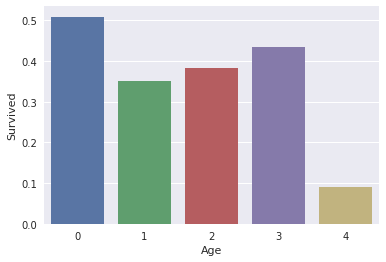

In [526]:
sns.barplot(x='Age', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

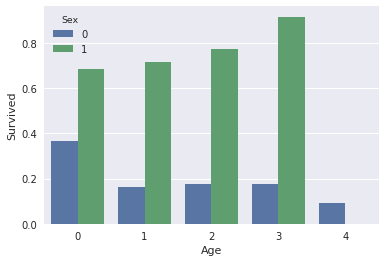

In [527]:
sns.barplot(x='Age', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [528]:
#Fare
def prepare_fare_default(train_test_data):
    for dataset in train_test_data:
        dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    
    for dataset in train_test_data:
        dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
        dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
        dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
        dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
        dataset['Fare'] = dataset['Fare'].astype(int)
        
prepare_fare_default(train_test_data)
    
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1


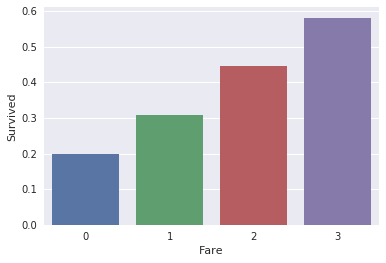

In [529]:
sns.barplot(x='Fare', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [530]:
# Family
def prepare_family_default(train_test_data):
    for dataset in train_test_data:
        dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1
prepare_family_default(train_test_data)

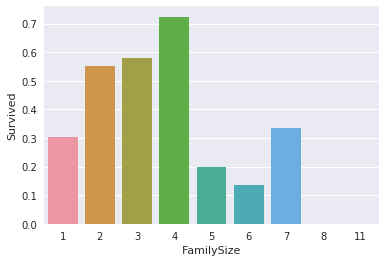

In [531]:
sns.barplot(x='FamilySize', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

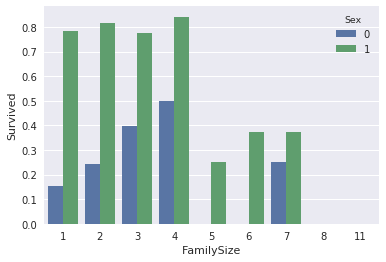

In [532]:
sns.barplot(x='FamilySize', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [533]:
def prepare_family_size_buckets(train_test_data):
    for dataset in train_test_data:
        dataset['FamilyBucket'] = 0
        dataset.loc[(dataset['FamilySize'] > 1) & (dataset['FamilySize'] <= 4), 'FamilyBucket'] = 1
        dataset.loc[(dataset['FamilySize'] > 4), 'FamilyBucket'] = 2
prepare_family_size_buckets(train_test_data)

In [534]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyBucket
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,2,1
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,1,0


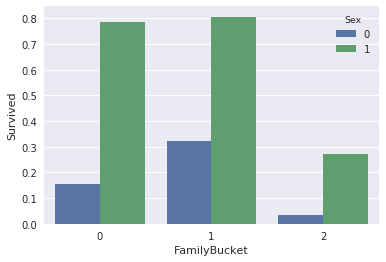

In [535]:
sns.barplot(x='FamilyBucket', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

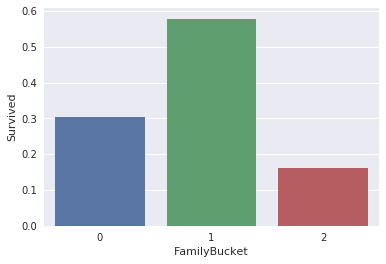

In [536]:
sns.barplot(x='FamilyBucket', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [537]:
# Alone
def prepare_alone_default(train_test_data):
    for dataset in train_test_data:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
        
prepare_alone_default(train_test_data)

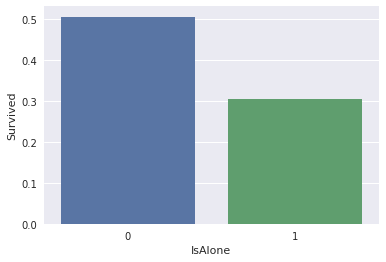

In [538]:
sns.barplot(x='IsAlone', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [610]:
#Ticket number.
train_test_data[0].Ticket.nunique()

681

In [621]:
train_tickets = train_test_data[0][["Ticket", "PassengerId"]]
test_tickets = train_test_data[1][["Ticket", "PassengerId"]]
tickets = pd.concat([train_tickets, test_tickets])

In [622]:
ppl_per_ticket = tickets.groupby(train_test_data[0].Ticket)[["PassengerId"]].count()

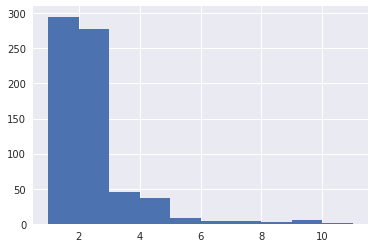

In [623]:
ppl_per_ticket.PassengerId.hist()

In [629]:
for dataset in train_test_data:
    dataset["TicketShared"] = dataset["Ticket"].map(ppl_per_ticket["PassengerId"])

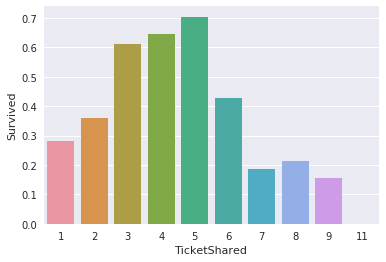

In [630]:
sns.barplot(x='TicketShared', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

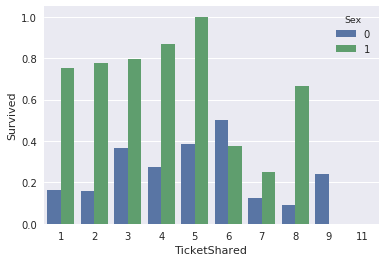

In [631]:
sns.barplot(x='TicketShared', y='Survived', hue="Sex", ci=None, data=train_test_data[0]) # ci=None will hide the error bar

In [539]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyBucket,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,2,1,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,1,0,1


In [540]:
#Training results.
X_train = train_test_data[0][['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilyBucket']]
y_train = train_test_data[0]['Survived']


In [541]:
scores = train_baseline_models(X_train, y_train)
print(scores)

{'Logistic regression': 0.8170652251393455, 'Naive Bayes': 0.7811851391612203, 'Support Vector Machines': 0.8327770147177784, 'Linear SVC': 0.8103297873208154, 'Decision Tree': 0.8115479644384488, 'Random forest': 0.8070284032091785, 'Stochastic Gradient Descent': 0.7342450688651306}


In [542]:
knn_scores = train_knn(X_train, y_train)
print(knn_scores)

{1: 0.7800364353761472, 3: 0.8014228379661301, 5: 0.8205178972738011, 7: 0.8216100365027572, 9: 0.8171471107569472, 11: 0.8216101074301001, 13: 0.8215658842316813}


In [543]:
# Decision tree scores.
train_descision_tree_combo(X_train, y_train)

{3: {3: (0.8260857291703239, 0.0007755478438219799),
  5: (0.8238510922988155, 0.000967036137482926),
  7: (0.8215912052931656, 0.000791823393430255),
  9: (0.8204738868574115, 0.0007227222511123077),
  11: (0.8204738868574115, 0.0007227222511123077),
  13: (0.8204738868574115, 0.0007227222511123077),
  15: (0.8204738868574115, 0.0007227222511123077),
  17: (0.8204738868574115, 0.0007227222511123077),
  19: (0.8204738868574115, 0.0007227222511123077)},
 5: {3: (0.8193879537709762, 0.0005917785169910498),
  5: (0.8126652119468598, 0.0009420487282202064),
  7: (0.7969472871532496, 0.0004995103816570349),
  9: (0.7992008261616924, 0.0005724418419977007),
  11: (0.7969850204997753, 0.0009868359655211434),
  13: (0.7969850204997753, 0.0009868359655211434),
  15: (0.7969850204997753, 0.0009868359655211434),
  17: (0.7969850204997753, 0.0009868359655211434),
  19: (0.7969850204997753, 0.0009868359655211434)},
 7: {3: (0.8204925762123167, 0.0008951288380519885),
  5: (0.8193942308408403, 0.001

In [544]:
# Decision tree scores.
train_decision_tree_max_depth(X_train, y_train)

{3: 0.8260857291703239,
 5: 0.8194258998995314,
 7: 0.8216477698492829,
 9: 0.8227840613493147,
 11: 0.8092881483601421,
 13: 0.8137888783798208,
 15: 0.8160424883156068,
 17: 0.8092881483601421,
 19: 0.8104054667958962}

<h3>Boost logistic regression</h3>


In [545]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyBucket,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,2,1,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,1,0,1


In [546]:
train_test_data[0].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,FamilyBucket,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,1.347924,0.523008,0.381594,1.505051,0.361392,1.670034,1.904602,0.466891,0.602694
std,257.353842,0.486592,0.836071,0.477990,0.844110,1.102743,0.806057,1.118148,0.635673,1.032609,1.613459,0.623305,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,3.000000,2.000000,7.000000,11.000000,2.000000,1.000000


In [547]:
for dataset in train_test_data:
    for title in train_test_data[0].Title.unique():
        feature_name = "Title_%s" % title
        print(feature_name)
        dataset[feature_name] = 0
        dataset.loc[dataset['Title'] == title, feature_name] = 1

Title_1
Title_3
Title_2
Title_4
Title_6
Title_0
Title_7
Title_5
Title_1
Title_3
Title_2
Title_4
Title_6
Title_0
Title_7
Title_5


In [548]:
for dataset in train_test_data:
    dataset['S'] = 0
    dataset.loc[dataset['Embarked'] == 0, 'S'] = 1
    dataset['C'] = 0
    dataset.loc[dataset['Embarked'] == 1, 'C'] = 1
    dataset['Q'] = 0
    dataset.loc[dataset['Embarked'] == 2, 'Q'] = 1

In [549]:
for dataset in train_test_data:
    dataset['SmallFamily'] = 0
    dataset['LargeFamily'] = 0
    dataset.loc[dataset['FamilyBucket'] == 1, 'SmallFamily'] = 1
    dataset.loc[dataset['FamilyBucket'] == 2, 'LargeFamily'] = 1

In [550]:
train_test_data[0].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyBucket', 'IsAlone', 'Title_1', 'Title_3', 'Title_2', 'Title_4',
       'Title_6', 'Title_0', 'Title_7', 'Title_5', 'S', 'C', 'Q',
       'SmallFamily', 'LargeFamily'],
      dtype='object')

In [602]:
#columns_used = ['Pclass', 'Sex', 'Age', 'IsAlone', 'SmallFamily', 'LargeFamily',
#                'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_6', 'Title_7']
columns_used = ['Pclass', 'Sex', 'Age', 'Fare', 'S', 'C', 'Q', 'IsAlone', 'SmallFamily', 'LargeFamily',
                'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_6', 'Title_7']

X_train = train_test_data[0][columns_used]
y_train = train_test_data[0]['Survived']


In [603]:
X_train.head()

,Pclass,Sex,Age,Fare,S,C,Q,IsAlone,SmallFamily,LargeFamily,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Title_7
0,3,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,1,1,2,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2,3,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,1,2,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,3,0,2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [604]:
clf = LogisticRegression()
np.mean(cross_val_score(clf, X_train, y_train, cv=5))

0.8227023175863992

In [605]:
clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_pred = model.predict(train_test_data[1][columns_used])

In [606]:
columns_used

['Pclass',
 'Sex',
 'Age',
 'Fare',
 'S',
 'C',
 'Q',
 'IsAlone',
 'SmallFamily',
 'LargeFamily',
 'Title_0',
 'Title_1',
 'Title_2',
 'Title_3',
 'Title_4',
 'Title_5',
 'Title_6',
 'Title_7']

In [607]:
model.coef_

array([[-0.91105722,  1.56045894, -0.30388241,  0.16357052, -0.08229774,
         0.31911092,  0.27868952,  1.12506837,  0.84596979, -1.45553547,
        -0.86775646, -1.02231255,  0.32444143,  0.74293983,  1.92233887,
         0.17855853, -0.45394066, -0.30876629]])

In [608]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA()
np.mean(cross_val_score(clf, X_train, y_train, cv=5))

/home/danka/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/danka/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/danka/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/danka/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/danka/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.8260668270333895

In [558]:
scores = train_baseline_models(X_train, y_train)

In [559]:
scores

{'Logistic regression': 0.8271778683992798,
 'Naive Bayes': 0.7564842309011284,
 'Support Vector Machines': 0.829418782340652,
 'Linear SVC': 0.8260542019663187,
 'Decision Tree': 0.8070472344187699,
 'Random forest': 0.8070786906954319,
 'Stochastic Gradient Descent': 0.6998983965810183}

In [560]:
tree_combo_results = train_descision_tree_combo(X_train, y_train)

In [561]:
results_all = []
for depth, min_leafs in tree_combo_results.items():
    for leaf in min_leafs:
        results_all.append((tree_combo_results[depth][leaf][0], depth, leaf))
results_all.sort()
results_all

[(0.7947251334941257, 5, 15),
 (0.7958424519298799, 5, 17),
 (0.7969597703656339, 5, 19),
 (0.7969597703656339, 7, 19),
 (0.7969597703656339, 9, 15),
 (0.7969597703656339, 9, 17),
 (0.7969597703656339, 11, 15),
 (0.7969597703656339, 13, 17),
 (0.7969597703656339, 15, 15),
 (0.7969597703656339, 15, 19),
 (0.7969597703656339, 17, 17),
 (0.7969597703656339, 17, 19),
 (0.7969597703656339, 19, 17),
 (0.7980770888013882, 7, 15),
 (0.7980770888013882, 7, 17),
 (0.7980770888013882, 9, 19),
 (0.7980770888013882, 11, 17),
 (0.7980770888013882, 11, 19),
 (0.7980770888013882, 13, 15),
 (0.7980770888013882, 13, 19),
 (0.7980770888013882, 15, 17),
 (0.7980770888013882, 17, 15),
 (0.7980770888013882, 19, 15),
 (0.7980770888013882, 19, 19),
 (0.7991944072371424, 5, 13),
 (0.8025526396142688, 13, 13),
 (0.8025526396142688, 15, 13),
 (0.803669958050023, 7, 13),
 (0.803669958050023, 9, 13),
 (0.803669958050023, 11, 13),
 (0.803669958050023, 17, 13),
 (0.803669958050023, 19, 13),
 (0.803676376974573, 5, 9

<h3> Add cabin </h3>
Tried to add cabin (at least the first cabin letter) to logistic regression. No success.

In [562]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].fillna('N')

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].apply(lambda w: w[0])

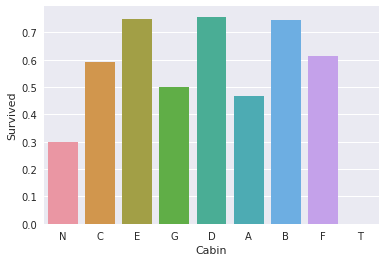

In [563]:
sns.barplot(x='Cabin', y='Survived', ci=None, data=train_test_data[0]) # ci=None will hide the error bar

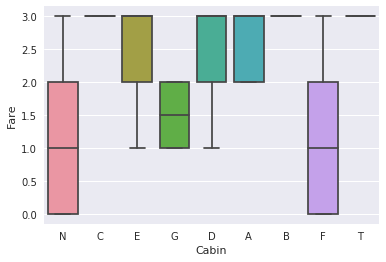

In [564]:
# Fare vs cabin
sns.boxplot(x='Cabin', y='Fare', data=train_test_data[0], showfliers=False) # ci=None will hide the error bar

In [565]:
pd.crosstab(index=[train_test_data[0]['Pclass'], train_test_data[0]['Survived']], columns=train_test_data[0]['Cabin'] )

Cabin            A   B   C   D   E  F  G    N  T
Pclass Survived                                 
1      0         8  12  24   7   7  0  0   21  1
       1         7  35  35  22  18  0  0   19  0
2      0         0   0   0   1   1  1  0   94  0
       1         0   0   0   3   3  7  0   74  0
3      0         0   0   0   0   0  4  2  366  0
       1         0   0   0   0   3  1  2  113  0

In [566]:
def prepare_cabin_default(train_test_data):
    for dataset in train_test_data:
        dataset['Cabin'] = dataset['Cabin'].fillna('N')

    for dataset in train_test_data:
        dataset['Cabin'] = dataset['Cabin'].apply(lambda w: w[0])
        
    


In [567]:
for dataset in train_test_data:
    for c in train_test_data[0].Cabin.unique():
        feature_name = "Cabin%s" % c
        print(feature_name)
        dataset[feature_name] = 0
        dataset.loc[dataset['Cabin'] == c, feature_name] = 1

prepare_cabin_default(train_test_data)

train_test_data[0].head()

CabinN
CabinC
CabinE
CabinG
CabinD
CabinA
CabinB
CabinF
CabinT
CabinN
CabinC
CabinE
CabinG
CabinD
CabinA
CabinB
CabinF
CabinT


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,LargeFamily,CabinN,CabinC,CabinE,CabinG,CabinD,CabinA,CabinB,CabinF,CabinT
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,...,0,0,1,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,...,0,0,1,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,...,0,1,0,0,0,0,0,0,0,0


In [568]:
train_test_data[0].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyBucket', 'IsAlone', 'Title_1', 'Title_3', 'Title_2', 'Title_4',
       'Title_6', 'Title_0', 'Title_7', 'Title_5', 'S', 'C', 'Q',
       'SmallFamily', 'LargeFamily', 'CabinN', 'CabinC', 'CabinE', 'CabinG',
       'CabinD', 'CabinA', 'CabinB', 'CabinF', 'CabinT'],
      dtype='object')

In [569]:
used_colums = ['Pclass', 'Sex', 'Age',
       'Fare', 
       'FamilyBucket', 'IsAlone', 'Title_1', 'Title_3', 'Title_2', 'Title_4',
       'Title_6', 'Title_0', 'Title_7', 'Title_5', 'S', 'C', 'Q',
       'SmallFamily', 'LargeFamily', 'CabinN', 'CabinC', 'CabinE', 'CabinG',
       'CabinD', 'CabinA', 'CabinB', 'CabinF', 'CabinT']
X_train = train_test_data[0][used_colums]
y_train = train_test_data[0]['Survived']


In [570]:
clf = LogisticRegression()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.8        0.82222222 0.7752809  0.86516854 0.83146067 0.80898876
 0.83146067 0.80898876 0.87640449 0.85227273]


0.8272247758483713

In [571]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_train, y_train, test_size=0.3)
clf = LogisticRegression()
model = clf.fit(X_train_f, y_train_f)
y_prob = clf.predict_proba(X_test_f)
model.score(X_test_f, y_test_f)

0.8097014925373134

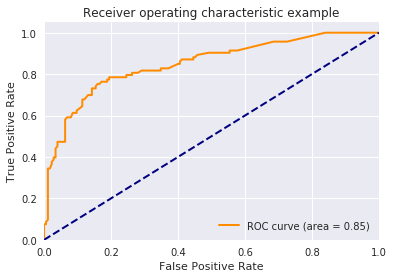

In [572]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_f, [prob[1] for prob in y_prob])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<h3>Decision tree</h3>
The same set of features.

In [573]:
X_train = train_test_data[0][used_colums]
y_train = train_test_data[0]['Survived']

clf = DecisionTreeClassifier(min_samples_leaf=10)
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.77777778 0.84444444 0.78651685 0.83146067 0.85393258 0.84269663
 0.85393258 0.7752809  0.84269663 0.82954545]


0.8238284530700261

In [574]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_train, y_train, test_size=0.3)
clf = DecisionTreeClassifier(min_samples_leaf = 10)
model = clf.fit(X_train_f, y_train_f)
y_prob = clf.predict_proba(X_test_f)
model.score(X_test_f, y_test_f)

0.7947761194029851

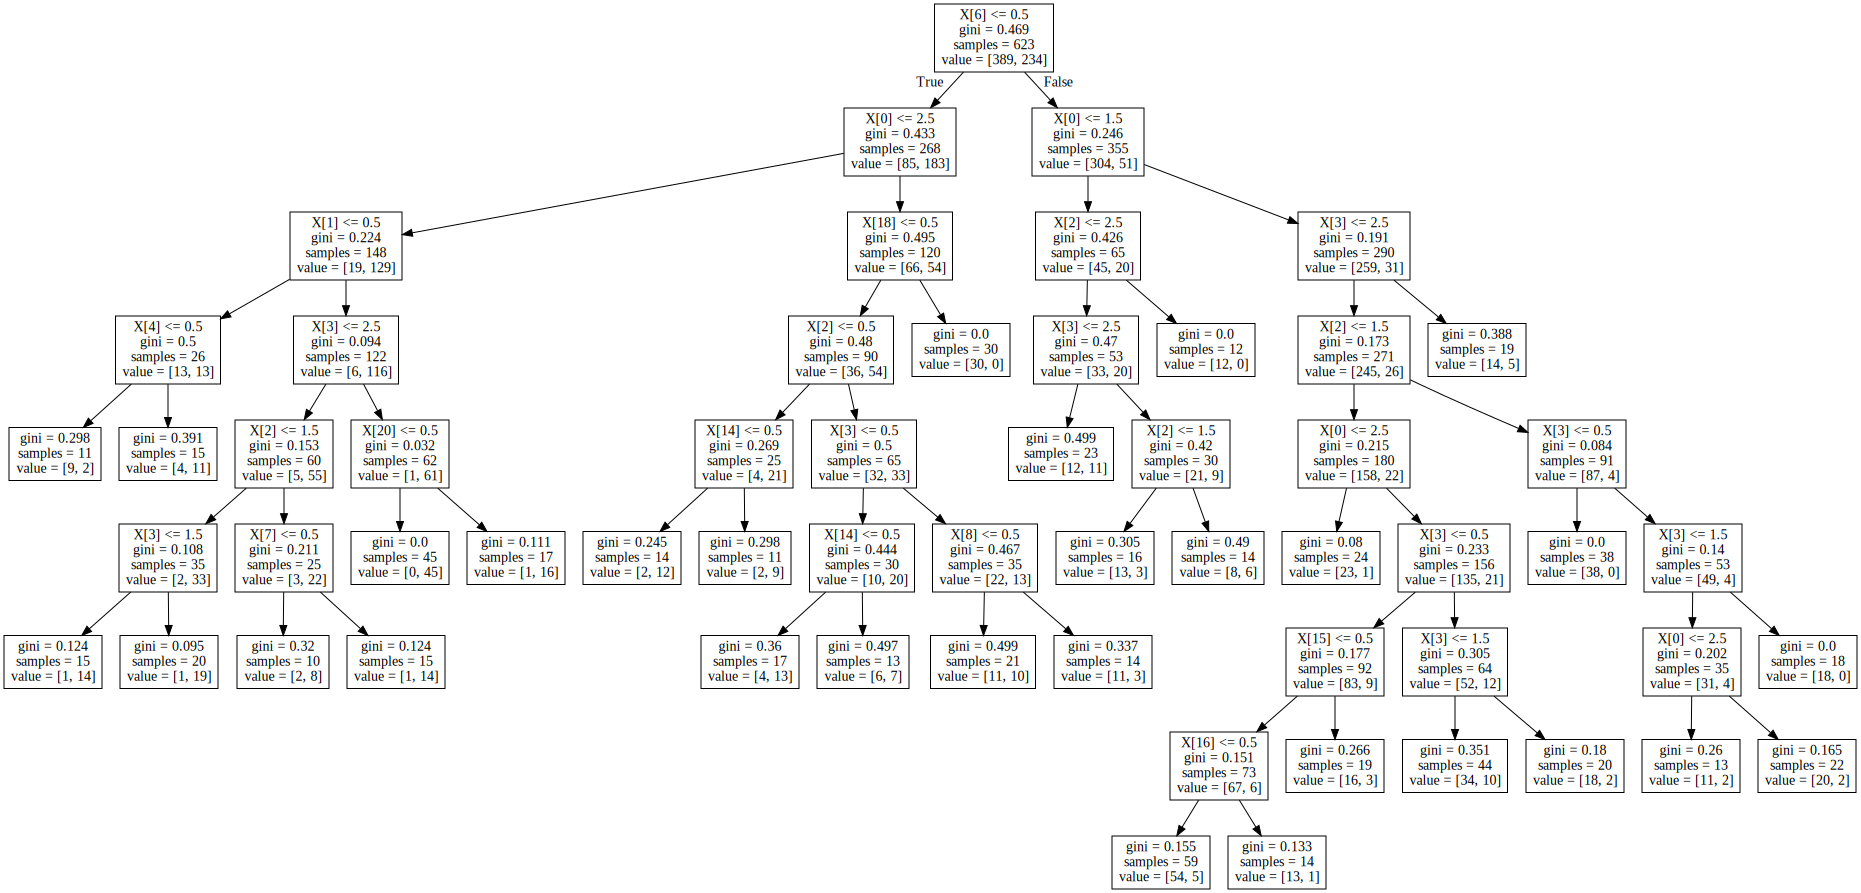

In [575]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph

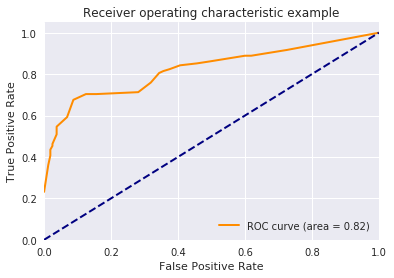

In [576]:

fpr, tpr, thresholds = roc_curve(y_test_f, [prob[1] for prob in y_prob])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [577]:
train_decision_tree_max_depth(X_train, y_train)

{3: 0.8249306064607008,
 5: 0.8025527105416119,
 7: 0.8227462570754458,
 9: 0.8194070686899402,
 11: 0.8194006497653901,
 13: 0.8126842559384805,
 15: 0.8160551133826776,
 17: 0.8171724318184317,
 19: 0.8160424883156068}

In [578]:
tree_combo_results = train_descision_tree_combo(X_train, y_train)

In [579]:
results_all = []
for depth, min_leafs in tree_combo_results.items():
    for leaf in min_leafs:
        results_all.append((tree_combo_results[depth][leaf][0], depth, leaf))
results_all.sort()
results_all

[(0.7857615486559799, 5, 19),
 (0.7891197101057634, 5, 15),
 (0.790255930678452, 5, 17),
 (0.7958425228572228, 5, 13),
 (0.7981213119998071, 5, 11),
 (0.8014353921058577, 15, 19),
 (0.8014353921058577, 19, 19),
 (0.8025527105416119, 7, 19),
 (0.8025527105416119, 9, 19),
 (0.8025527105416119, 11, 19),
 (0.8025527105416119, 13, 19),
 (0.8025527105416119, 17, 19),
 (0.8025717545332325, 5, 7),
 (0.8025717545332325, 5, 9),
 (0.8047935535556409, 7, 15),
 (0.8047935535556409, 9, 15),
 (0.8047935535556409, 11, 15),
 (0.8047935535556409, 15, 15),
 (0.8047935535556409, 17, 15),
 (0.8047935535556409, 19, 15),
 (0.804793624482984, 5, 3),
 (0.8059108719913951, 13, 15),
 (0.8070219842846285, 7, 13),
 (0.8070219842846285, 11, 13),
 (0.8070219842846285, 15, 13),
 (0.8070219842846285, 17, 13),
 (0.8070219842846285, 19, 13),
 (0.8070470925640837, 7, 17),
 (0.8070470925640837, 9, 17),
 (0.8070470925640837, 11, 17),
 (0.8070470925640837, 13, 17),
 (0.8070470925640837, 15, 17),
 (0.8070470925640837, 17, 17

In [580]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_train, y_train, test_size=0.3)
clf = DecisionTreeClassifier(min_samples_leaf=11)
model = clf.fit(X_train_f, y_train_f)
y_prob = clf.predict_proba(X_test_f)
model.score(X_test_f, y_test_f)

0.8246268656716418

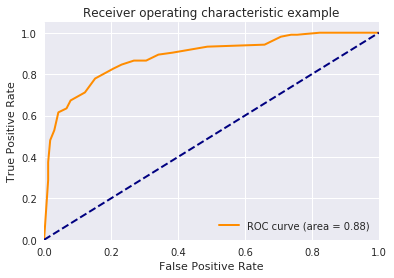

In [581]:
fpr, tpr, thresholds = roc_curve(y_test_f, [prob[1] for prob in y_prob])
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [582]:
clf = DecisionTreeClassifier(max_depth=7)
model = clf.fit(X_train, y_train)

In [583]:
train_test_data[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,LargeFamily,CabinN,CabinC,CabinE,CabinG,CabinD,CabinA,CabinB,CabinF,CabinT
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,N,...,0,1,0,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0,N,...,0,1,0,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1,N,...,0,1,0,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1,N,...,0,1,0,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1,N,...,0,1,0,0,0,0,0,0,0,0


In [584]:
tree_preds = model.predict(train_test_data[1][used_colums])

<h3> kNN </h3>
The same set of features. Scaled.

In [585]:
train_knn(X_train, y_train)

{1: 0.7711799862897445,
 3: 0.7936523928935058,
 5: 0.8238571565866499,
 7: 0.8238635755112,
 9: 0.8160235152513293,
 11: 0.8160235861786724,
 13: 0.8126526578071323}

<h3>Naive bayes</h3>

In [586]:
train_test_data[0].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyBucket', 'IsAlone', 'Title_1', 'Title_3', 'Title_2', 'Title_4',
       'Title_6', 'Title_0', 'Title_7', 'Title_5', 'S', 'C', 'Q',
       'SmallFamily', 'LargeFamily', 'CabinN', 'CabinC', 'CabinE', 'CabinG',
       'CabinD', 'CabinA', 'CabinB', 'CabinF', 'CabinT'],
      dtype='object')

In [587]:
simple_feature_set = ['Pclass', 'Sex', 'Age', 'FamilyBucket', 'Title']
X_train = train_test_data[0][simple_feature_set]
y_train = train_test_data[0]['Survived']

clf = GaussianNB()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

# Kind of manually arrived with this set by removing and adding features.

[0.76666667 0.81111111 0.75280899 0.86516854 0.79775281 0.78651685
 0.78651685 0.74157303 0.83146067 0.77272727]


0.791230280331404

In [588]:
model = clf.fit(X_train, y_train)
model.score(X_train, y_train)

0.7912457912457912

In [589]:
train_knn(X_train, y_train)

{1: 0.7407606673837421,
 3: 0.7979958415298744,
 5: 0.7845880912281673,
 7: 0.8193691934887279,
 9: 0.8193754705585918,
 11: 0.8182203478489688,
 13: 0.8025589166841325}

In [590]:
train_descision_tree_combo(X_train, y_train)

{3: {3: (0.8339069582206031, 0.00041993573870146813),
  5: (0.8316723213490949, 0.000471603177832281),
  7: (0.829412434343445, 0.0003317406215774828),
  9: (0.8282951159076909, 0.0002801170860758022),
  11: (0.8282951159076909, 0.0002801170860758022),
  13: (0.8282951159076909, 0.0002801170860758022),
  15: (0.8282951159076909, 0.0002801170860758022),
  17: (0.8282951159076909, 0.0002801170860758022),
  19: (0.8282951159076909, 0.0002801170860758022)},
 5: {3: (0.8137826013099572, 0.000577872332567914),
  5: (0.8115479644384488, 0.0006394705507129733),
  7: (0.8047936954103271, 0.00040405221454339993),
  9: (0.804799972480191, 0.0004640699478969137),
  11: (0.8048188036897823, 0.0007569007101581035),
  13: (0.8048188036897823, 0.0007569007101581035),
  15: (0.8048188036897823, 0.0007569007101581035),
  17: (0.8048188036897823, 0.0007569007101581035),
  19: (0.8070534405612907, 0.0007253769534595982)},
 7: {3: (0.8182707771899083, 0.0006697398193519393),
  5: (0.8160361403183998, 0.000

In [591]:
clf = LogisticRegression()
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
np.mean(score)

[0.81111111 0.83333333 0.7752809  0.85393258 0.83146067 0.78651685
 0.82022472 0.78651685 0.82022472 0.81818182]


0.813678356599705

In [592]:
train_baseline_models(X_train, y_train)

{'Logistic regression': 0.8114660078935041,
 'Naive Bayes': 0.7945929603902707,
 'Support Vector Machines': 0.8305234757093356,
 'Linear SVC': 0.8137131989047399,
 'Decision Tree': 0.8081708299243878,
 'Random forest': 0.8126526578071323,
 'Stochastic Gradient Descent': 0.7023945780301846}

In [593]:
train_test_data[0].groupby(['Pclass', 'Sex', 'FamilyBucket', 'Age', 'Title'])[['Survived']].mean()

Survived
Pclass Sex FamilyBucket Age Title          
1      0   0            0   1      0.000000
                        1   0      1.000000
                            1      0.380952
                        2   0      0.000000
                            1      0.413793
                            6      0.000000
                            7      0.000000
                        3   1      0.090909
                            7      0.666667
                        4   1      0.250000
           1            0   4      1.000000
                        1   1      0.428571
                        2   0      0.000000
                            1      0.500000
                        3   0      1.000000
                            1      0.222222
                            6      1.000000
                        4   1      0.000000
                            7      0.000000
           2            1   1      0.000000
                        3   1      0.000000
       1   0            0   2      1.000000
                        1   2      1.000000
                            3      1.000000
                        2   2      1.000000
                            3      1.000000
                            5      1.000000
                        3   0      1.000000
                            2      0.666667
                            3      1.000000
...                                     ...
3      0   0            2   1      0.072464
                        3   1      0.000000
                        4   1      0.000000
           1            0   1      0.200000
                            4      1.000000
                        1   1      0.100000
                        2   1      0.000000
                            4      1.000000
           2            0   1      0.000000
                            4      0.058824
                        1   1      0.000000
                            4      0.000000
                        2   1      0.000000
       1   0            0   2      0.857143
                        1   2      0.567568
                            3      0.500000
                        2   2      0.545455
                            3      1.000000
                        3   3      1.000000
           1            0   2      0.733333
                            3      1.000000
                        1   2      0.363636
                            3      0.550000
                        2   2      0.500000
                            3      0.500000
           2            0   2      0.090909
                        1   2      0.166667
                            3      0.000000
                        2   2      0.000000
                            3      0.142857

[100 rows x 1 columns]

<h3>Logitic regresison model</h3>

In [594]:
train_test_data[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,LargeFamily,CabinN,CabinC,CabinE,CabinG,CabinD,CabinA,CabinB,CabinF,CabinT
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,N,...,0,1,0,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0,N,...,0,1,0,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1,N,...,0,1,0,0,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1,N,...,0,1,0,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1,N,...,0,1,0,0,0,0,0,0,0,0


In [595]:
train_test_data[0].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyBucket', 'IsAlone', 'Title_1', 'Title_3', 'Title_2', 'Title_4',
       'Title_6', 'Title_0', 'Title_7', 'Title_5', 'S', 'C', 'Q',
       'SmallFamily', 'LargeFamily', 'CabinN', 'CabinC', 'CabinE', 'CabinG',
       'CabinD', 'CabinA', 'CabinB', 'CabinF', 'CabinT'],
      dtype='object')

In [596]:
clf = LogisticRegression()
model = clf.fit(train_test_data[0][simple_feature_set], y_train)
#y_prob = clf.predict_proba(train_test_data[1][['Pclass', 'Sex', 'IsAlone', 'Title']])


In [597]:
model.coef_


array([[-1.07526351,  2.15857424, -0.44527976, -0.62655135,  0.60696236]])

In [598]:
clf = DecisionTreeClassifier(max_depth=3)
model = clf.fit(train_test_data[0][simple_feature_set], y_train)

y_pred = clf.predict(train_test_data[1][simple_feature_set])


In [599]:
clf = SVC()
model = clf.fit(train_test_data[0][simple_feature_set], y_train)
y_pred = clf.predict(train_test_data[1][simple_feature_set])


In [600]:
len(y_pred)

418

In [601]:
#results = pd.DataFrame(zip(test['PassengerId'], y_pred))
passenger = pd.DataFrame(test['PassengerId'])
pred = pd.DataFrame(y_pred)

results = pd.concat([passenger, pred], axis=1)
results.to_csv('result.csv', index=False)
